In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
cust_ords_merge = pd.read_pickle(r'/Users/matth/Desktop/Holocron Docs/Matthew/Coding Class/Career_Foundry Data Science Course/2. Data Immersion/Lesson 4/Python Folder for Lesson 4/02 Data/Prepared Data/4.9_cust_ords_merge.pkl')

In [44]:
path = r'/Users/matth/Desktop/Holocron Docs/Matthew/Coding Class/Career_Foundry Data Science Course/2. Data Immersion/Lesson 4'

In [ ]:
#Questions for 4.10 pt 1

In [ ]:
#2 Consider any security implications that might exist for this new data. You’ll need to address any PII 
#data in the data before continuing your analysis.

In [ ]:
for col in cust_ords_merge.columns:
    print(col)

In [ ]:
#2a These data do contain specific identifying information, namely first and last name, age, state of residence, dependants, income and family status.
#I would make sure that the supervisor was aware of this and, if it were an issue, offer to use the .drop() command for elements
#such as first & last name, gender, age, dependants, and family status. Income is something I would be willin to remove, however,
#when its tied to a randomized user_id, it can still be useful for analysis like in the previous exercise. I would keep an original
#dataset with all the information for my own analysis and something to return to if I had issues with later commands put in.

In [4]:
#3 The Instacart officers are interested in comparing customer behavior in different geographic areas. 
#Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column 
#from your customers data set.

#3.1:

region = []

for state in cust_ords_merge['State']: 

 if (state == 'ME') or (state == 'NH') or (state =='VT') or (state =='MA') or (state =='RI') or (state =='CT'):
    region.append("New_England")     
 elif (state == 'NY') or (state =='PA') or (state =='NJ'):
    region.append("Mid_Atlantic")  
 elif (state == 'WI') or (state =='MI') or (state =='IL') or (state =='IN') or (state =='OH'):
    region.append("NE_Central")
 elif (state == 'ND') or (state =='SD') or (state =='NE') or (state =='KS') or (state =='MN') or (state =='IA') or (state =='MO'):
    region.append("NW_Central")
 elif (state == 'DE') or (state =='MD') or (state =='DC') or (state =='VA') or (state =='WV') or (state =='NC') or (state =='SC') or (state =='GA') or (state =='FL'):
    region.append("S_Atlantic")
 elif (state == 'KY') or (state =='TN') or (state =='MS') or (state =='AL'):
    region.append("SE_Central")
 elif (state == 'ID') or (state =='MT') or (state =='WY') or (state =='NV') or (state =='CO') or (state =='AZ') or (state =='NM'):
    region.append("Mountain")
 else: region.append("Pacific")
  

In [5]:
 #3.1.2
cust_ords_merge['region'] = region

In [6]:
#3.2

cust_ords_merge['region'].value_counts(dropna = False)

Pacific         20315770
S_Atlantic      18163851
NW_Central      14226225
Mountain        14176299
New_England     12092255
NE_Central      10097196
SE_Central       8167973
Mid_Atlantic     6118650
Name: region, dtype: int64

In [7]:
#3b. Determine difference in regional spending habits. Cross 'Region' w/ 'Spending Flag'

crosstab_region_spend = pd.crosstab(cust_ords_merge['region'], cust_ords_merge['spending_flag'], dropna = False)
crosstab_region_spend

spending_flag,High Spender,Low Spender
region,,
Mid_Atlantic,118315,6000335
Mountain,275159,13901140
NE_Central,194312,9902884
NW_Central,279716,13946509
New_England,237392,11854863
Pacific,398217,19917553
SE_Central,162438,8005535
S_Atlantic,364985,17798866


In [8]:
#4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. 
#Create an exclusion flag for low-activity customers (customers with less than 5 orders) and 
#exclude them from the data. Make sure you export this sample.

cust_ords_merge.loc[cust_ords_merge['max_order'] < 5, 'activity'] = 'low'

In [9]:
#Identify highly active users

cust_ords_merge.loc[cust_ords_merge['max_order'] > 5, 'activity'] = 'high'

In [10]:
#exclude low activity customers from new df

cust_ords_new = cust_ords_merge[cust_ords_merge['max_order'] > 5]

In [11]:
#5a. Create customer profiles for new marketing strategy. Their status with what they buy. Age-dept

crosstab_age = pd.crosstab(cust_ords_new['Age'], cust_ords_new['department_id'], dropna = False)
crosstab_age.to_clipboard()

In [12]:
#Age-time

crosstab_age_time = pd.crosstab(cust_ords_new['Age'], cust_ords_new['order_hour_of_day'], dropna = False)
crosstab_age_time.to_clipboard()

In [14]:
#Age-day

crosstab_age_day = pd.crosstab(cust_ords_new['Age'], cust_ords_new['order_dow'], dropna = False)
crosstab_age_day.to_clipboard()

In [15]:
#Income-Dept
crosstab_inc_dept = pd.crosstab(cust_ords_new['income'], cust_ords_new['department_id'], dropna = False)
crosstab_inc_dept.to_clipboard()

In [16]:
#income-time
crosstab_inc_time = pd.crosstab(cust_ords_new['income'], cust_ords_new['order_hour_of_day'], dropna = False)
crosstab_inc_time.to_clipboard()

In [18]:
#income-day
crosstab_inc_day = pd.crosstab(cust_ords_new['income'], cust_ords_new['order_dow'], dropna = False)
crosstab_inc_day.to_clipboard()

In [19]:
#family status-dept id
crosstab_fam_dept = pd.crosstab(cust_ords_new['fam_status'], cust_ords_new['department_id'], dropna = False)
crosstab_fam_dept.to_clipboard()

In [20]:
#Family status that spends the most
crosstab_fam_spend = pd.crosstab(cust_ords_new['prices'].sum(), cust_ords_new['fam_status'], dropna = False)
crosstab_fam_spend.to_clipboard()

In [21]:
#Fam status-day
crosstab_fam_day = pd.crosstab(cust_ords_new['fam_status'], cust_ords_new['order_dow'], dropna = False)
crosstab_fam_day.to_clipboard()

In [22]:
#Dept that generated most revenue
crosstab_price_dept = pd.crosstab(cust_ords_new['prices'].sum(), cust_ords_new['department_id'], dropna = False)
crosstab_price_dept.to_clipboard()

In [23]:
#Customer frequency spending more
crosstab_freq_spend = pd.crosstab(cust_ords_new['prices'].sum(), cust_ords_new['frequency'], dropna = False)
crosstab_freq_spend.to_clipboard()

In [24]:
#customer frequency determine items purchased
crosstab_freq_dept = pd.crosstab(cust_ords_new['department_id'], cust_ords_new['frequency'], dropna = False)
crosstab_freq_dept.to_clipboard()

In [26]:
#Family size spending habits
crosstab_family_spend = pd.crosstab(cust_ords_new['prices'].sum(), cust_ords_new['dependants'], dropna = False)
crosstab_family_spend.to_clipboard()

In [28]:
#Key departments with n_dependants
crosstab_depend_dept = pd.crosstab(cust_ords_new['department_id'], cust_ords_new['dependants'], dropna = False)
crosstab_depend_dept.to_clipboard()

In [30]:
#Flag income level
cust_ords_new.loc[cust_ords_new['income'] <= 50000, 'income_level'] = 'low_income'
cust_ords_new.loc[(cust_ords_new['income'] <=100000) & (cust_ords_new['income'] > 50000), 'income_level'] = 'mid_income'
cust_ords_new.loc[cust_ords_new['income'] > 100000, 'income_level'] = 'high_income'

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [31]:
cust_ords_new.tail()

,user_id,First Name,Last Name,Gender,State,Age,dependants,fam_status,income,product_id,...,busiest_period_of_day,spending,spending_flag,frequency,frequency_flag,max_order,loyalty_flag,region,activity,income_level
103358214,14612,Cynthia,Noble,Female,NY,55,1,married,NaN,-16575,...,Most Orders,7.46875,Low Spender,30.0,Non-frequent customer,9,New customer,Mid_Atlantic,high,NaN
103358215,14612,Cynthia,Noble,Female,NY,55,1,married,NaN,-16575,...,Average Orders,7.46875,Low Spender,30.0,Non-frequent customer,9,New customer,Mid_Atlantic,high,NaN
103358216,14612,Cynthia,Noble,Female,NY,55,1,married,NaN,-16575,...,Most Orders,7.46875,Low Spender,30.0,Non-frequent customer,9,New customer,Mid_Atlantic,high,NaN
103358217,14612,Cynthia,Noble,Female,NY,55,1,married,NaN,-16301,...,Most Orders,7.46875,Low Spender,30.0,Non-frequent customer,9,New customer,Mid_Atlantic,high,NaN
103358218,14612,Cynthia,Noble,Female,NY,55,1,married,NaN,-16301,...,Most Orders,7.46875,Low Spender,30.0,Non-frequent customer,9,New customer,Mid_Atlantic,high,NaN


In [32]:
cust_ords_new['income_level'].value_counts(dropna = False)

NaN           53665723
low_income    49218403
Name: income_level, dtype: int64

In [33]:
#double check prices, looks like 4.9 fix did not save, but scatterplot visualization is OK. 
cust_ords_new['prices'].max()

25.0

In [34]:
#income level-spending

crosstab_inc_lev_spend = pd.crosstab(cust_ords_new['prices'].mean(), cust_ords_new['income_level'])
crosstab_inc_lev_spend.to_clipboard()

<AxesSubplot:xlabel='prices', ylabel='prices'>

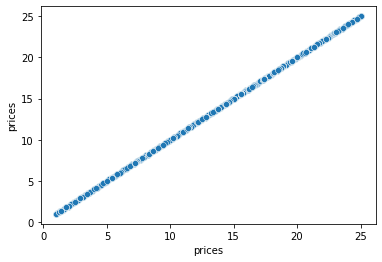

In [35]:
#See what price check visualization looks like. Max price is OK. 
sns.scatterplot(x= 'prices', y = 'prices', data = cust_ords_new)

In [36]:
#Assign random numbers, create list of true/ false values 

dev = np.random.rand(len(cust_ords_new)) <= 0.7

In [37]:
#Store 70% in big

big = cust_ords_new[dev]

In [38]:
#store rest in small

small = cust_ords_new[~dev]

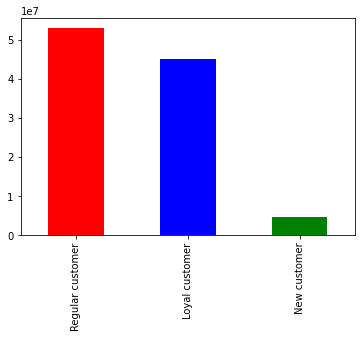

In [39]:
#Customer Loyalty

loyal_bar = cust_ords_new['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

In [55]:
#Save graph

loyal_bar.figure.savefig('Loyalty_Bar.png')

In [46]:
#Subgroup Loyalty, department id

loyalty_dept_bar = cust_ords_new.groupby(['department_id', 'loyalty_flag'])['department_id'].count().unstack('loyalty_flag').fillna(0)

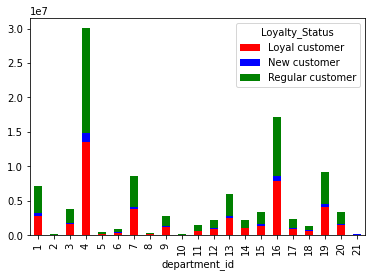

In [47]:
#Edited visual of graph and got this error. Not sure how code changed to make error. Saved previous iteration just in time.

loyalty_dept_bar = loyalty_dept_bar.plot.bar(stacked = True, color = ['red', 'blue', 'green'])
plt.legend(title='Loyalty_Status')

In [48]:
#loyalty-Dept

crosstab_loyalty_dept = pd.crosstab(cust_ords_new['loyalty_flag'], cust_ords_new['department_id'], dropna = False)


In [49]:
#table
crosstab_loyalty_dept
pd.options.display.max_columns = None

In [50]:
crosstab_loyalty_dept

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,2845576,48726,1656871,13555034,187494,356111,3743756,122518,1114211,55449,570639,921278,2514787,982401,1365524,7836252,926274,671836,4087041,1443833,86038
New customer,375609,5734,171640,1337293,29065,43900,393057,15648,147187,3909,76322,113075,299817,106734,182109,759371,129379,46240,412342,158709,13225
Regular customer,3866357,60352,1903951,15177440,269439,453807,4396447,172426,1485531,50104,772301,1211709,3132507,1164105,1837880,8588164,1287249,626589,4663934,1732387,119433


In [54]:
loyalty_dept_bar.figure.savefig('loyalty_dept_bar.png')

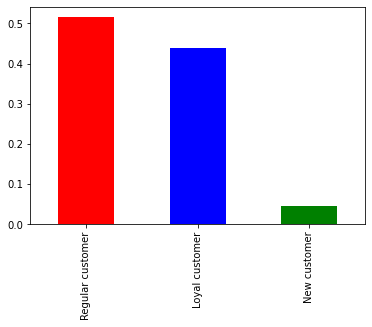

In [56]:
#Loyalty status affects amount spent

loyal_price_bar = cust_ords_new['loyalty_flag'].value_counts('prices').plot.bar(color = ['red', 'blue', 'green'])

In [57]:
loyal_price_bar.figure.savefig('loyal_price_bar.png')

In [58]:
#loyalty-time

crosstab_loyalty_time = pd.crosstab(cust_ords_new['loyalty_flag'], cust_ords_new['order_hour_of_day'], dropna = False)

In [59]:
crosstab_loyalty_time.T

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,284534,35977,374775
1,142957,19873,203873
2,84011,12636,123259
3,62753,9539,90321
4,73688,7133,87880
5,126166,12439,140219
6,458994,32958,430176
7,1413742,100117,1319245
8,2663649,207141,2588921


In [60]:
crosstab_loyalty_time.to_clipboard()

In [61]:
crosstab_loyalty_time_T = crosstab_loyalty_time.T

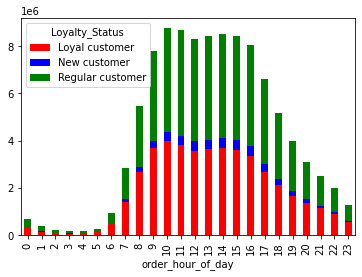

In [62]:
loyalty_time_bar_T = crosstab_loyalty_time_T.plot.bar(stacked= True, color = ['red', 'blue', 'green'])
plt.legend(title='Loyalty_Status')

In [63]:
loyalty_time_bar_T.figure.savefig('loyalty_time_bar_T.png')

In [64]:
#Loyalty ordering habits-Day

crosstab_loyal_day = pd.crosstab(cust_ords_new['loyalty_flag'], cust_ords_new['order_dow'], dropna = False)
crosstab_loyal_day.to_clipboard()

In [65]:
crosstab_loyal_day.T

loyalty_flag,Loyal customer,New customer,Regular customer
order_dow,,,
0,8071974,974925,10635309
1,8000854,829443,9141925
2,5905265,627788,6849999
3,5477992,573935,6147507
4,5498499,544977,5975518
5,6186736,577004,6596844
6,5950329,692293,7625010


In [66]:
#save transposed

crosstab_loyal_day_T=crosstab_loyal_day.T

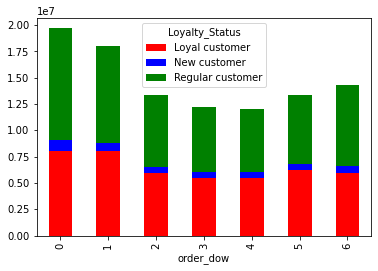

In [67]:
loyalty_day_bar = crosstab_loyal_day_T.plot.bar(stacked= True, color = ['red', 'blue', 'green'])
plt.legend(title='Loyalty_Status')

In [68]:
loyalty_day_bar.figure.savefig('loyalty_day_bar.png')

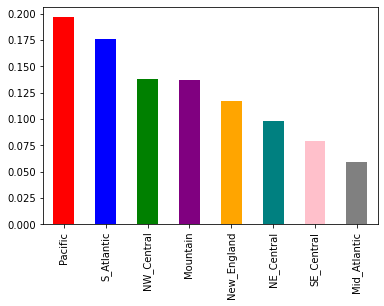

In [71]:
#Crosstab region-population

region_users_bar = cust_ords_new['region'].value_counts('prices').plot.bar(color = ['red', 'blue', 'green', 'purple', 'orange', 'teal', 'pink', 'grey'])

In [72]:
region_users_bar.figure.savefig('region_users_bar.png')

In [73]:
#Region- Order hour

crosstab_region_time = pd.crosstab(cust_ords_new['region'], cust_ords_new['order_hour_of_day'], dropna = False)

In [79]:
crosstab_region_time.T

region,Mid_Atlantic,Mountain,NE_Central,NW_Central,New_England,Pacific,SE_Central,S_Atlantic
order_hour_of_day,,,,,,,,
0,41694,93212,69146,93730,81668,137162,54149,124525
1,22839,50327,35801,50079,44237,69875,29123,64422
2,12799,31033,22203,29191,26375,42794,16979,38532
3,9499,22264,15341,22185,18719,32533,14079,27993
4,10424,22624,16523,23450,19375,33031,14787,28487
5,16696,37750,25173,37208,32451,55942,22051,51553
6,55358,124157,88975,127677,108251,178944,74433,164333
7,166802,386427,268768,396325,331404,557734,229268,496376
8,320827,746859,533659,751339,637837,1069380,431765,968045


In [82]:
crosstab_region_time_T.to_clipboard()

In [81]:
crosstab_region_time_T = crosstab_region_time.T

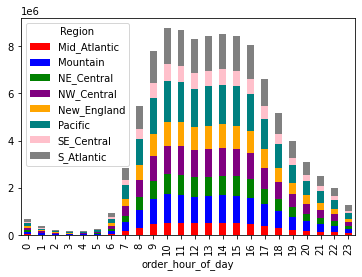

In [83]:
region_time_bar = crosstab_region_time_T.plot.bar(stacked= True, color = ['red', 'blue', 'green', 'purple', 'orange', 'teal', 'pink', 'grey'])
plt.legend(title='Region')

In [84]:
region_time_bar.figure.savefig('region_time_bar.png')

In [86]:
#Regional ordering habits-Day

crosstab_Region_day = pd.crosstab(cust_ords_new['region'], cust_ords_new['order_dow'], dropna = False)
crosstab_Region_day.to_clipboard()

In [87]:
crosstab_region_day_T = crosstab_Region_day.T

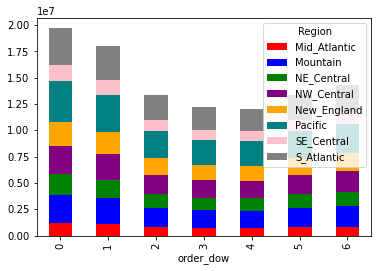

In [88]:
region_day_bar = crosstab_region_day_T.plot.bar(stacked= True, color = ['red', 'blue', 'green', 'purple', 'orange', 'teal', 'pink', 'grey'])
plt.legend(title='Region')

In [89]:
region_day_bar.figure.savefig('region_day_bar.png')

In [94]:
#Frequency of purchases viewed by region and loyalty

region_loyalty_freq = cust_ords_new.groupby(['region', 'loyalty_flag'])['days_since_prior_order'].mean().unstack('loyalty_flag').fillna(0)

<AxesSubplot:xlabel='region'>

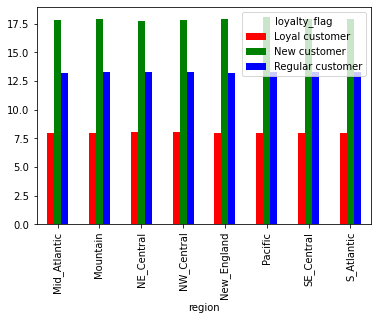

In [96]:
region_loyalty_freq.plot.bar(color = ['red', 'green', 'blue'])

In [111]:
region_loyalty_freq.figure.savefig('region_loyalty_freq.png')

AttributeError: 'DataFrame' object has no attribute 'figure'

In [104]:
#create subset for age-dept_id chart
#plot age-dept id-tried a couple of graphs: processing time was long and will need to create age groups for bar graph to be legible.
cust_ords_1 = small[['Age', 'department_id']]

In [105]:
#Create subset for age-price
cust_ords_age_price = small[['Age', 'prices']]

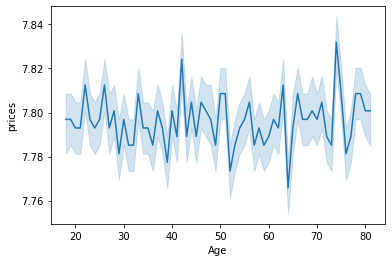

In [106]:
#Plot Age-price

Line_age_Prices = sns.lineplot(data = cust_ords_age_price, x = 'Age', y = 'prices')

In [110]:
Line_age_Prices.figure.savefig('Line_age_Prices.png')

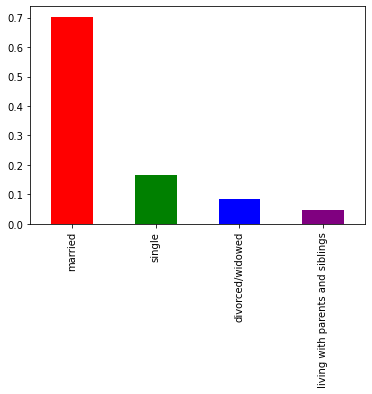

In [109]:
#Family status affects amount spent

bar_1 = cust_ords_new['fam_status'].value_counts('prices').plot.bar(color = ['red','green','blue','purple'])

In [112]:
bar_1.figure.savefig('fam_status_prices.png')

In [113]:
#Relate age to family status

crosstab_fam_status_spend = pd.crosstab(cust_ords_new['spending_flag'],cust_ords_new['fam_status'], dropna=False )
crosstab_fam_status_spend

fam_status,divorced/widowed,living with parents and siblings,married,single
spending_flag,,,,
High Spender,165716,86951,1425995,342007
Low Spender,8625853,4759123,70857715,16620766


In [114]:
crosstab_fam_status_spend.to_clipboard()

In [115]:
crosstab_age_fam = pd.crosstab(cust_ords_new['fam_status'],cust_ords_new['Age'], dropna=False )
crosstab_age_fam.T 

fam_status,divorced/widowed,living with parents and siblings,married,single
Age,,,,
18,0,1181367,0,416614
19,0,1277888,0,381674
20,0,1198960,0,417558
21,0,1187859,0,384705
22,0,0,1213100,397461
...,...,...,...,...
77,395641,0,1240112,0
78,394369,0,1228958,0
79,385033,0,1245790,0


In [116]:
crosstab_age_fam_t = crosstab_age_fam.T

In [117]:
crosstab_age_fam_t.to_clipboard()

In [118]:
#fam status-hour
crosstab_fam_hour = pd.crosstab(cust_ords_new['fam_status'], cust_ords_new['order_hour_of_day'], dropna = False)
crosstab_fam_hour.to_clipboard()

In [119]:
crosstab_fam_hour.T

fam_status,divorced/widowed,living with parents and siblings,married,single
order_hour_of_day,,,,
0,58782,32983,486153,117368
1,30501,17147,257944,61111
2,19134,10346,153921,36505
3,14109,7009,114186,27309
4,13992,8196,119566,26947
5,24948,12866,194298,46712
6,78518,44504,646698,152408
7,246417,135399,1980026,471262
8,468697,255819,3833571,901624


In [120]:
crosstab_fam_hour_t = crosstab_fam_hour.T

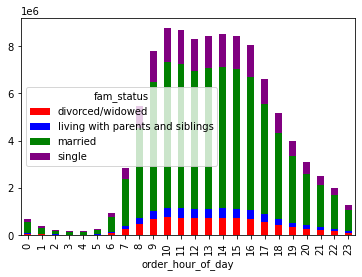

In [121]:
#graph family status with hour of day

fam_hour_bar = crosstab_fam_hour_t.plot.bar(stacked= True, color = ['red', 'blue', 'green', 'purple'])

In [122]:
#Subgroup dependants, department_id

depend_dept_bar = cust_ords_new.groupby(['department_id', 'dependants'])['department_id'].count().unstack('dependants').fillna(0)

<AxesSubplot:xlabel='department_id'>

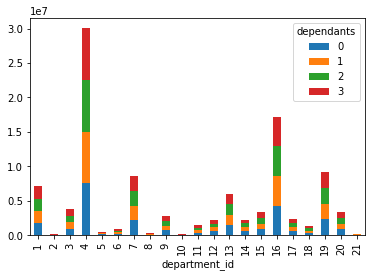

In [123]:
#Plot dependants-dept_id

depend_dept_bar.plot(kind = 'bar', stacked = True)

In [124]:
depend_dept_bar.figure.savefig('depend_dept_bar.png')

AttributeError: 'DataFrame' object has no attribute 'figure'

In [125]:
#Subgroup items purchased based off family status

sub_fam_items = cust_ords_new.groupby(['department_id', 'fam_status'])['department_id'].count().unstack('fam_status').fillna(0)

<AxesSubplot:xlabel='department_id'>

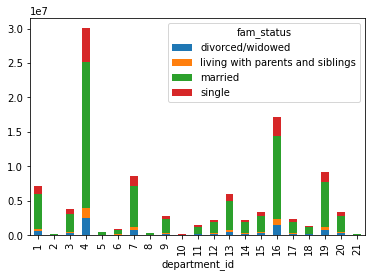

In [126]:
#Stacked bar chart items from each department based off family status

sub_fam_items.plot(kind = 'bar', stacked = True)

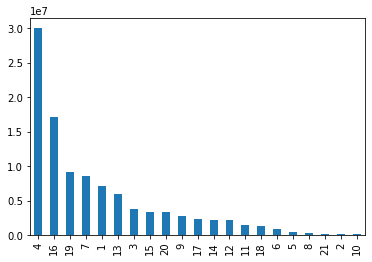

In [127]:
#Rank Department usage

bar_dept_use = cust_ords_new['department_id'].value_counts().plot.bar()

In [128]:
bar_dept_use.figure.savefig('bar_dept_use.png')

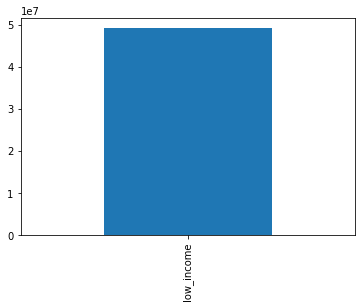

In [129]:
#Income level-amount ordered

bar_income_order = cust_ords_new['income_level'].value_counts().plot.bar()

In [130]:
#7a. Aggregate Min, mean, Max on customer profile level for expenditure

cust_ords_new.groupby('user_id').agg({'prices' : ['min', 'mean', 'max']})

prices                     
              min      mean        max
user_id                               
-32768   1.000000  8.390625  21.296875
-32767   1.299805  6.804688  14.703125
-32766   1.000000  7.320312  25.000000
-32765   1.099609  6.570312  21.093750
-32764   1.000000  7.433594  19.406250
...           ...       ...        ...
 32763   1.099609  7.539062  24.000000
 32764   1.200195  7.101562  15.296875
 32765   1.000000  7.843750  23.093750
 32766   1.000000  7.167969  15.203125
 32767   1.200195  7.964844  14.796875

[64178 rows x 3 columns]

In [131]:
# Aggregate Min, mean, Max on customer profile level for usage frequency

cust_ords_new.groupby('user_id').agg({'days_since_prior_order' : ['min', 'mean', 'max']})


days_since_prior_order                 
                           min       mean   max
user_id                                        
-32768                     2.0  19.343750  30.0
-32767                     0.0  21.343750  30.0
-32766                     1.0  12.304688  30.0
-32765                     4.0   8.757812  30.0
-32764                     0.0   9.101562  30.0
...                        ...        ...   ...
 32763                     0.0  15.718750  30.0
 32764                     0.0  13.968750  30.0
 32765                     0.0   6.851562  30.0
 32766                     1.0   7.429688  30.0
 32767                     1.0  14.179688  30.0

[64178 rows x 3 columns]

In [132]:
#8a. Regional comparison of customer profiles. 

Sbar_region = cust_ords_new.groupby(['department_id', 'region'])['department_id'].count().unstack('region').fillna(0)

<AxesSubplot:xlabel='department_id'>

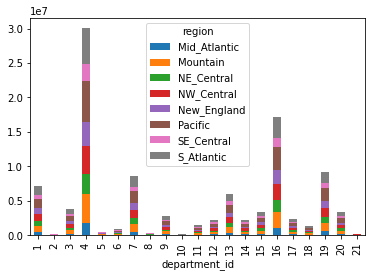

In [133]:
Sbar_region.plot(kind = 'bar', stacked = True)

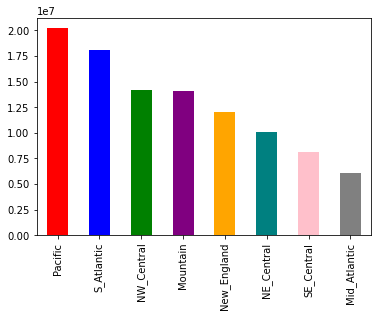

In [135]:
#Number items purchased by region

bar_region_items = cust_ords_new['region'].value_counts().plot.bar(color = ['red', 'blue', 'green', 'purple', 'orange', 'teal', 'pink', 'grey'])

In [136]:
bar_region_items.figure.savefig('bar_region_items.png')

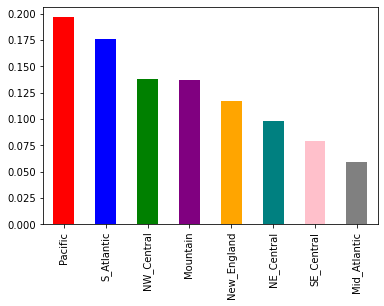

In [138]:
#Amount each region spends

bar_region_spend = cust_ords_new['region'].value_counts('prices').plot.bar(color = ['red', 'blue', 'green', 'purple', 'orange', 'teal', 'pink', 'grey'])

In [139]:
bar_region_spend.figure.savefig('bar_region_spend.png')

In [141]:
#Customer loyalty per region

Sbar_loyal_region = cust_ords_new.groupby(['region', 'loyalty_flag'])['days_since_prior_order'].mean().unstack('loyalty_flag').fillna(0)

<AxesSubplot:xlabel='region'>

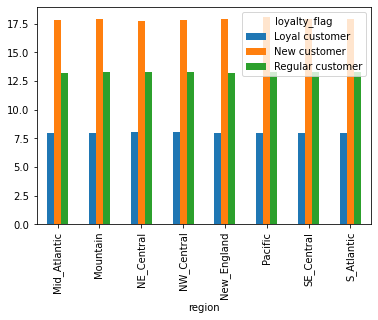

In [142]:
Sbar_loyal_region.plot(kind = 'bar', stacked = False)

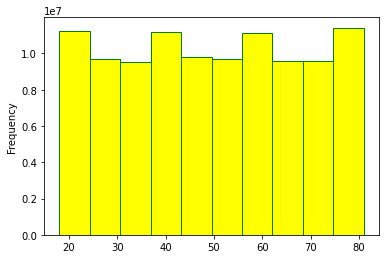

In [144]:
#Age histogram

age_hist = cust_ords_new['Age'].plot.hist(bins = 10, color = 'yellow', edgecolor = 'green')


In [145]:
age_hist.figure.savefig('age_hist.png')

In [146]:
# Aggregate Min, mean, Max on customer age based on price

Age_price_table = cust_ords_new.groupby('Age').agg({'prices' : ['min', 'mean', 'max']})
Age_price_table.to_clipboard()

In [147]:
# Aggregate Min, mean, Max on customer age based on frequency

Age_freq_table = cust_ords_new.groupby('Age').agg({'frequency' : ['min', 'mean', 'max']})
Age_freq_table.to_clipboard()

In [148]:
# Aggregate Min, mean, Max on dept id based on age

Age_freq_table = cust_ords_new.groupby('department_id').agg({'Age' : ['min', 'mean', 'max']})
Age_freq_table.to_clipboard()

In [150]:
cust_ords_new.head()

,user_id,First Name,Last Name,Gender,State,Age,dependants,fam_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,busiest day,busiest two-day,busiest_period_of_day,spending,spending_flag,frequency,frequency_flag,max_order,loyalty_flag,region,activity,income_level
0,26711,Deborah,Esquivel,Female,MO,48,3,married,NaN,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.398438,16402,6,6,4,29.0,7,Regularly busy,Regularly busy,Fewest Orders,8.242188,Low Spender,17.0,Regular customer,21,Regular customer,NW_Central,high,NaN
1,26711,Deborah,Esquivel,Female,MO,48,3,married,NaN,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.398438,-1460,7,5,18,13.0,1,Regularly busy,Regularly busy,Average Orders,8.242188,Low Spender,17.0,Regular customer,21,Regular customer,NW_Central,high,NaN
2,26711,Deborah,Esquivel,Female,MO,48,3,married,NaN,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.398438,-27026,10,3,19,30.0,3,Regularly busy,Least busy days,Average Orders,8.242188,Low Spender,17.0,Regular customer,21,Regular customer,NW_Central,high,NaN
3,26711,Deborah,Esquivel,Female,MO,48,3,married,NaN,144,Coarse Grind Garlic Powder & Parsley Blend,104,13,2.099609,25125,20,6,11,7.0,3,Regularly busy,Regularly busy,Most Orders,7.656250,Low Spender,7.0,Frequent customer,21,Regular customer,NW_Central,high,NaN
4,26711,Deborah,Esquivel,Female,MO,48,3,married,NaN,194,Lamb Rib Chops,122,12,18.906250,21587,11,6,11,5.0,15,Regularly busy,Regularly busy,Most Orders,7.656250,Low Spender,7.0,Frequent customer,21,Regular customer,NW_Central,high,NaN


In [153]:
#spending & Frequency flag
crosstab_spend_freq= pd.crosstab(cust_ords_new['frequency_flag'], cust_ords_new['spending_flag'], dropna = False)
crosstab_spend_freq

spending_flag,High Spender,Low Spender
frequency_flag,,
Frequent customer,1360344,67291386
Non-frequent customer,209466,11139988
Regular customer,450859,22432083


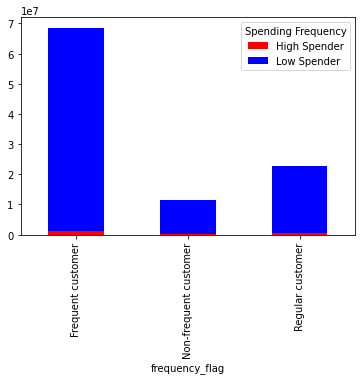

In [155]:
spend_freq_bar = crosstab_spend_freq.plot.bar(stacked = True, color = ['red', 'blue'])
plt.legend(title='Spending Frequency')

In [157]:
spend_freq_bar.figure.savefig('spend_freq_bar.png')

In [159]:
#income level & Frequency flag
crosstab_income_freq= pd.crosstab(cust_ords_new['frequency_flag'], cust_ords_new['income_level'], dropna = False)
crosstab_income_freq

income_level,low_income
frequency_flag,
Frequent customer,32882429
Non-frequent customer,5358595
Regular customer,10977379


In [160]:
crosstab_income_freq.to_clipboard()

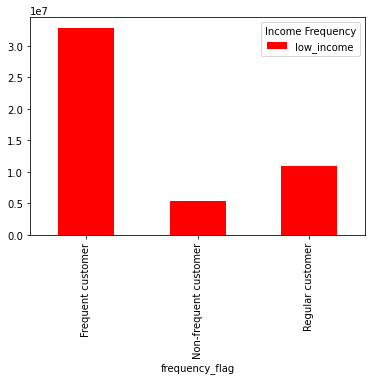

In [162]:
#create graph

income_freq_bar = crosstab_income_freq.plot.bar(color = ['red', 'blue', 'green'])
plt.legend(title='Income Frequency')

In [163]:
income_freq_bar.figure.savefig('income_freq_bar.png')